# Third Meeting: Log and Power Transformation
- Transformation: log, power transformation
- Box-Cox transformation

# Log and Power Transformation

Logarithmic and power transformations are useful techniques in data engineering, particularly for data preprocessing and feature engineering. These transformations help in managing the scale of variables and improving the performance of machine learning models. Here’s a detailed look at their uses:

### 1. **Normalizing Data**
Data normalization is crucial for many statistical techniques and machine learning algorithms that assume data is normally distributed or at least symmetrically distributed. Both log and power transformations can help in reducing skewness in data distributions.

- **Log Transformation**: This is particularly effective for handling right-skewed data. By applying a logarithm to the data, large values are pulled closer to the mean, which can significantly reduce the skewness and stabilize the variance. For example, income distributions often benefit from log transformations as they are typically right-skewed.
  
- **Power Transformation**: Various power transformations (like square root, cube root, or more generalized Box-Cox transformations) can be applied depending on the degree of skewness and the nature of the data. These transformations can help in both reducing right skewness (using roots) and left skewness (using squares or higher powers).

### 2. **Improving Model Performance**
Transformations can change the relationships between variables in ways that can make them more linear and thus easier to model with linear models.

- **Linear Relationships**: Many machine learning models, including linear regression, assume a linear relationship between features. Log and power transformations can help linearize relationships between variables, improving model accuracy.
  
- **Handling Heteroscedasticity**: Variance stabilizing transformations (like log transformation) can help when the variability of a dataset is proportional to the mean of the data. By stabilizing variance, these transformations make the data more amenable to modeling.

### 3. **Scaling Features**
In machine learning, it’s often beneficial to have features on a similar scale, as this can speed up learning and lead to better models. Log and power transformations can scale down large values, bringing features onto a comparable scale.

- **Dimensionality Reduction**: Techniques like PCA (Principal Component Analysis) perform better when data variance is appropriately scaled and distributed. Transformations can aid in achieving this uniformity.

### 4. **Handling Outliers**
Transformations can reduce the effect of outliers in the data by decreasing the range and pulling outliers closer to the bulk of the data.

- **Outlier Mitigation**: While not a substitute for proper outlier detection and handling methods, log and power transformations can reduce the impact outliers have on the overall data analysis.

### Implementation Considerations
When implementing these transformations, it's crucial to remember:

- **Zero or Negative Values**: Log transformations require positive values. In cases where data includes zero or negative values, a constant may be added to all values to enable the transformation.
- **Inversibility**: It’s important to be able to reverse the transformation (especially for interpretation and reporting purposes), so keeping track of the transformation and its parameters is essential.
- **Model Interpretation**: Transformations can complicate the interpretation of model coefficients, so understanding and communicating the effects of transformations is important.

Overall, log and power transformations are powerful tools in the data engineering toolkit, helping to prepare and optimize data for better analysis and modeling outcomes.

## Box-Cox Transformation

The Box-Cox transformation is a family of power transformations that includes the logarithm as a special case. It is defined as:

$$
y(\lambda) = \begin{cases}
\frac{y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\
\log(y) & \text{if } \lambda = 0.
\end{cases}
$$

Here, $y$ is the original data, and $\lambda$ is the transformation parameter. The Box-Cox transformation is used to stabilize variance and make the data more closely follow a normal distribution. It is particularly useful when dealing with heteroscedasticity and non-normality in data.



# Example in python

In [57]:
# Example of log transformation
import numpy as np
import matplotlib.pyplot as plt

# Create a simulated non-normal dataset and use log and power transformation to normalize it. 
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)
# scale is the mean of the distribution.
# size is the number of random numbers to draw.

# Use c_ to concatenate the data with the new column of uniform random numbers
data = np.c_[data, np.random.uniform(size=1000)]

original_data = data[:, 0]
log_trans_data = np.log(original_data + 1) # +1 to avoid log(0) which is undefined. 
power_trans_data = np.power(original_data, 1/3) # Cube root transformation

# Preview the data array with the first 10 rows
print(data[:10, :])


[[1.59174902 0.59288027]
 [2.51186153 0.0100637 ]
 [1.84644629 0.4758262 ]
 [1.5744023  0.70877039]
 [1.10209698 0.04397543]
 [2.07631859 0.87952148]
 [1.1510384  0.52008142]
 [4.44704883 0.03066105]
 [6.62982436 0.22441361]
 [0.9672042  0.9536757 ]]


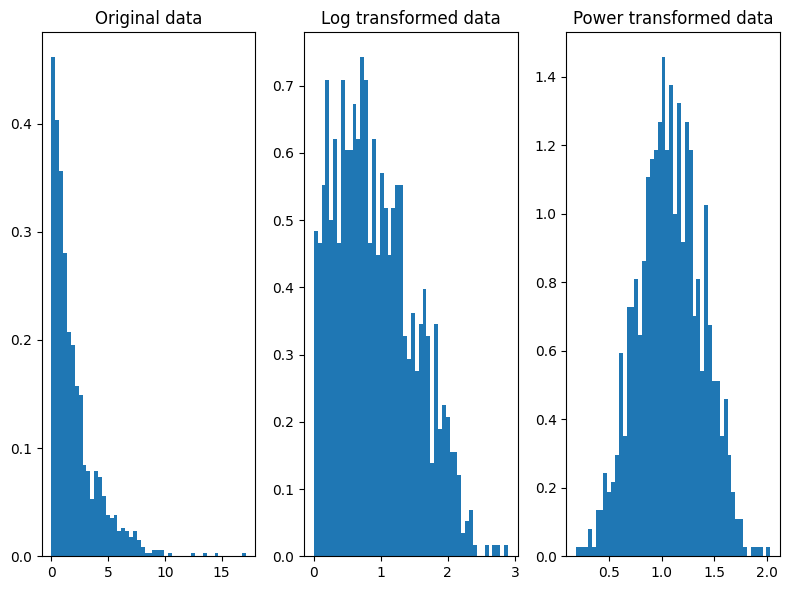

In [58]:
# Create a figure
fig = plt.figure(figsize=(8, 6))

# Plot the original data
ax1 = fig.add_subplot(131) # 1 row, 3 cols, 1st subplot
ax1.hist(original_data, bins=50, density=True)
ax1.set_title('Original data')

# Plot the log transformed data
ax2 = fig.add_subplot(132)
ax2.hist(log_trans_data, bins=50, density=True)
ax2.set_title('Log transformed data')

# Plot the power transformed data 
ax3 = fig.add_subplot(133)
ax3.hist(power_trans_data, bins=50, density=True)
ax3.set_title('Power transformed data')

plt.tight_layout()
plt.show()



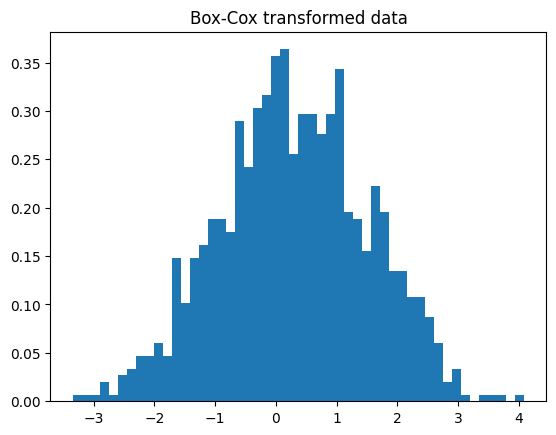

In [52]:
# Box-cox transformation
from scipy.stats import boxcox
# Perform a Box-Cox transformation
data_boxcox, _ = boxcox(original_data)
# Plot the histogram of the data
plt.hist(data_boxcox, bins=50, density=True)
plt.title('Box-Cox transformed data')
plt.show()


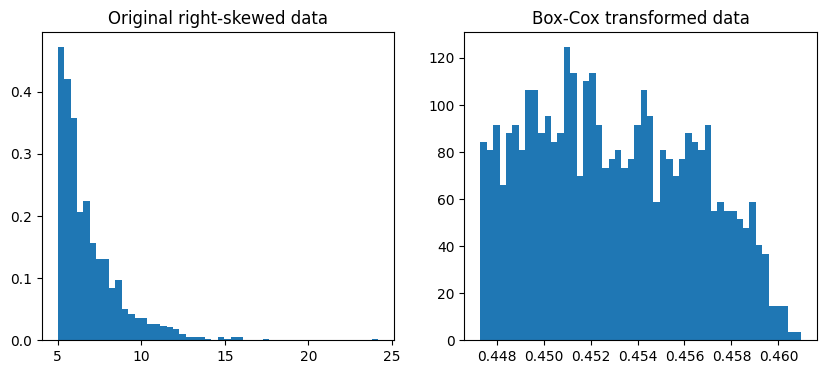

In [60]:
# Box-Cox for right-skewed data
# Generate a right-skewed dataset
right_skewed = np.random.exponential(scale=2, size=1000) + 5
# Perform a Box-Cox transformation
data_boxcox, _ = boxcox(right_skewed)
# Plot the histogram of the original and transformed data
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(right_skewed, bins=50, density=True)
ax[0].set_title('Original right-skewed data')
ax[1].hist(data_boxcox, bins=50, density=True)
ax[1].set_title('Box-Cox transformed data')
plt.show()

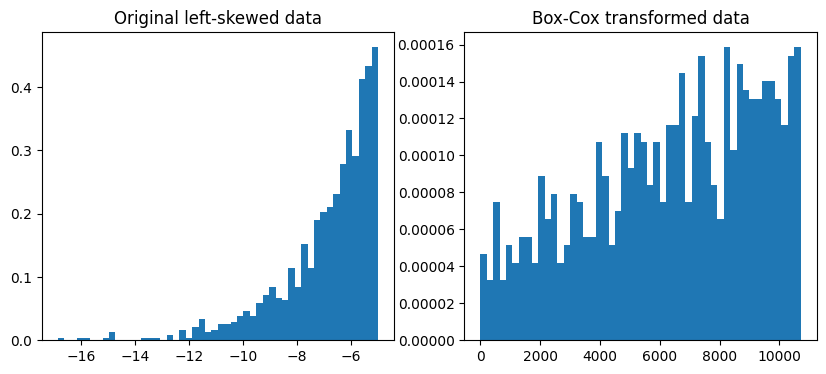

In [61]:
# Box-Cox for left-skewed data
# Generate a left-skewed dataset
left_skewed = -np.random.exponential(scale=2, size=1000) - 5
# Perform a Box-Cox transformation
data_boxcox, _ = boxcox(left_skewed - min(left_skewed) + 1) # Shift the data to be positive

# Plot the histogram of the original and transformed data
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(left_skewed, bins=50, density=True)
ax[0].set_title('Original left-skewed data')
ax[1].hist(data_boxcox, bins=50, density=True)
ax[1].set_title('Box-Cox transformed data')
plt.show()


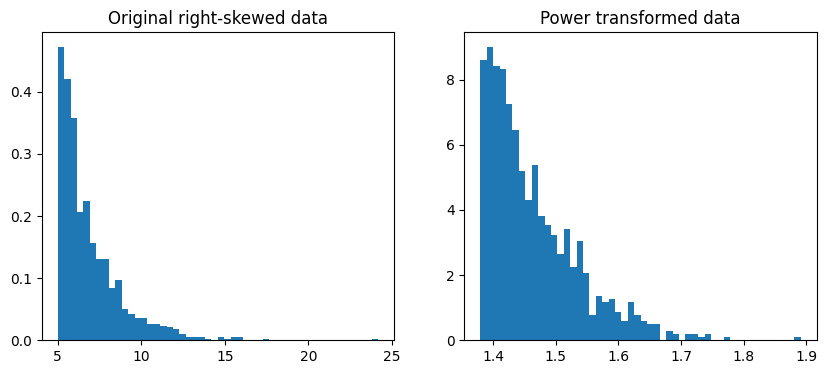

In [63]:
# Do the same for the power transformation
# Power transformation for right-skewed data
# Perform a power transformation
data_power = np.power(right_skewed, 1/5)
# Plot the histogram of the original and transformed data
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(right_skewed, bins=50, density=True)
ax[0].set_title('Original right-skewed data')
ax[1].hist(data_power, bins=50, density=True)
ax[1].set_title('Power transformed data')
plt.show()

# Test normality of data

In [65]:
# Test normality of the transformed data
from scipy.stats import normaltest
# normaltest tests the null hypothesis that a sample comes from a normal distribution.
# The null hypothesis is that the data is normally distributed.
# If the p-value is less than 0.05, we reject the null hypothesis and conclude that the data is not normally distributed.
# If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that the data is normally distributed.

# Test the normality of the original data
_, p_orig = normaltest(original_data)
# Test the normality of the log transformed data
_, p_log = normaltest(log_trans_data)
# Test the normality of the power transformed data
_, p_power = normaltest(power_trans_data)

print(p_orig, p_log, p_power)
# Example output: 
# Values of 4.801001278930967e-99 1.6183710122569136e-12 0.0931385050239246 for the original, log transformed, and power transformed data, respectively.
# The p-values for the original and log transformed data are less than 0.05, indicating that the data is not normally distributed.
# The p-value for the power transformed data is greater than 0.05, indicating that the data is normally distributed.


4.801001278930967e-99 1.6183710122569136e-12 0.0931385050239246


In [ ]:

# Test the normality of the Box-Cox transformed data
_, p_boxcox = normaltest(data_boxcox)
# Test the normality of the power transformed data
_, p_power = normaltest(data_power)
print(p_boxcox, p_power) # All are very close to 0, so they are not normal.


# Fourth Meeting, Categorical variables:
- Encoding: one-hot, dummy encoding
- Large categorical variables: feature hashing 

## 1. **Handling Categorical Variables**
Categorical variables are variables that contain label values rather than numeric values. These variables can be divided into two types:

- **Ordinal Variables**: These variables have a natural order (like ratings from 1 to 5).
- **Nominal Variables**: These variables don’t have an intrinsic order (like colors or cities).

## 2. **One-Hot Encoding**
One-hot encoding is a method used to convert categorical variables into binary vectors. Each category is mapped to a binary value, where all values are zero except for the category being represented, which is marked with a 1. This creates a binary matrix where each column corresponds to a unique category.

## 3. **Applications**
One-hot encoding is widely used in machine learning for various reasons:

- **Machine Learning Algorithms**: Many machine learning algorithms cannot work directly with categorical data. One-hot encoding allows these algorithms to interpret categorical data as binary vectors.
- **Nominal Variables**: For nominal variables, one-hot encoding is the preferred method to convert categories into a format that can be provided to machine learning algorithms.
- **Interpretability**: One-hot encoding makes it easier to interpret the relationship between categorical variables and the target variable.
-  **Avoiding Order**: One-hot encoding prevents the algorithm from assuming an ordinal relationship between categories. For example, if we encode colors as 1, 2, and 3, the algorithm might assume that color 3 is greater than color 1, which is not the case.

## **Dummy Encoding**:
One-hot encoding can lead to multicollinearity if all the columns are used in a model. For example, consider a table below where the variable `City` has been one-hot encoded:

| City_A | City_B | City_C |
|--------|--------|--------|
| 1      | 0      | 0      |
| 0      | 1      | 0      |
| 0      | 0      | 1      |

In this case, the third column can be derived from the first two columns. Therefore, to avoid multicollinearity, one column should be dropped.

## Why They Are Used:

- Model Requirement: Many machine learning algorithms, especially those that are based on distance calculations (like k-means clustering or k-NN) and linear models, do not inherently handle categorical data. One-hot encoding transforms the categorical data into a numerical format that these models can work with.
Prevents Misleading Weights: Unlike assigning numeric labels (like 1, 2, 3), which could lead algorithms to assume an ordinal relationship where higher numbers carry more "weight," one-hot encoding treats each category as equally distant from others.

## Problems:

- Dimensionality Increase: One-hot encoding can significantly increase the dataset's dimensionality (i.e., number of features), especially if the categorical variable has many levels. This can lead to issues like model complexity, increased computational costs, and potential overfitting—a phenomenon known as the "curse of dimensionality."
Sparsity of Data: Most of the matrix will be zeros, leading to sparse data which can be inefficient to store and compute.


# Python examples

In [11]:
# Example of a simple one-hot encoding for a list of strings
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)


['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]


In [15]:

# binary encode
onehot_encoder = OneHotEncoder(sparse_output=False)
# reshape the integer_encoded array to have one column and as many rows as there are elements in the array
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)

# fit the onehot_encoder to the integer_encoded array
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)


[[0]
 [0]
 [2]
 [0]
 [1]
 [1]
 [2]
 [0]
 [2]
 [1]]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [16]:

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

# play more here with the onehot_encoded array


['cold']


In [2]:
# Example end-to-end workflow for one hot encodin and linear regression

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Make example data for one hot encoding and linear regression
# The data has a categorical column 'name' and a numerical column 'value'
# The goal is to predict 'value' from 'name' using one hot encoding and linear regression
# We create  3000 rows of data with linear relationship between 'name' and 'value'.

data = {
    'name': np.random.choice(['A', 'B', 'C', 'D'], 3000),
    'value': np.random.choice([1, 2, 3, 4, 5], 3000) + np.random.choice([0, 1, 2], 3000)
}

df = pd.DataFrame(data)
print('Preview original data:')
print(df.head())


Preview original data:
  name  value
0    B      4
1    D      5
2    C      5
3    B      4
4    D      2


In [6]:

# One hot encoding
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['name']])

print('Preview One hot encoded data:')
print(encoded.toarray()[:5])

encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['name']))

Preview One hot encoded data:
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [10]:
encoded_df.head()

,name_A,name_B,name_C,name_D
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0


In [20]:

# Linear regression
X = encoded_df
y = df['value']

# X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random state is a seed value for the random number generator. It is used to make the random number generation reproducible.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
print('Predicted values:')
print(y_pred)


Predicted values:
[4.03100586 3.92553711 3.92553711 4.03100586 3.90136719 3.90136719
 3.90136719 3.94799805 3.94799805 3.90136719 4.03100586 3.94799805
 3.92553711 3.90136719 4.03100586 3.90136719 3.90136719 3.90136719
 3.94799805 4.03100586 3.92553711 3.90136719 3.90136719 4.03100586
 3.92553711 3.90136719 3.94799805 3.92553711 3.92553711 3.90136719
 3.94799805 4.03100586 3.92553711 3.90136719 4.03100586 3.92553711
 3.92553711 3.92553711 3.90136719 3.94799805 3.90136719 3.92553711
 3.90136719 3.90136719 3.94799805 4.03100586 3.90136719 3.92553711
 3.90136719 3.94799805 3.94799805 3.94799805 4.03100586 3.90136719
 3.90136719 3.90136719 3.90136719 3.90136719 3.94799805 3.92553711
 4.03100586 4.03100586 3.94799805 3.92553711 3.90136719 3.90136719
 4.03100586 4.03100586 3.90136719 3.92553711 3.92553711 4.03100586
 3.92553711 3.90136719 3.94799805 3.94799805 3.92553711 4.03100586
 4.03100586 4.03100586 3.90136719 3.92553711 3.94799805 3.94799805
 4.03100586 4.03100586 4.03100586 3.94799805

In [21]:
# Mean squared error is the average of the squared differences between the predicted and actual values.
# It is used in regression analysis to determine the quality of a model.
# The smaller the mean squared error, the closer the predicted and actual values are.

print('Mean squared error:')
print(mean_squared_error(y_test, y_pred))

# Get the coefficients
coefficients = model.coef_
print('Coefficients:')
print(coefficients)


Mean squared error:
2.834540343483289
Coefficients:
[1.27655055e+12 1.27655055e+12 1.27655055e+12 1.27655055e+12]


In [23]:

# Print the coefficients
# Coefficients are the values that multiply the predictor values in the regression equation.
# They represent the change in the dependent variable for a one-unit change in the predictor variable.
# The intercept is the value of the dependent variable when all the predictor variables are zero.

print('Coefficients:')
for feature, coef in zip(encoder.get_feature_names_out(), model.coef_):
    print(f'{feature}: {coef:.2f}')
print(f'Intercept: {model.intercept_:.2f}')


Coefficients:
name_A_0.0: 1276550548044.91
name_A_1.0: 1276550548044.96
name_B_0.0: 1276550548045.04
name_B_1.0: 1276550548044.94
Intercept: -1276550548041.01


## Dummy encoding

In [26]:
# Example end-to-end workflow for one dummy encoding and logistic regression

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Reuse the data from the previous example
data = {
    'name': np.random.choice(['A', 'B', 'C', 'D'], 3000),
    'value': np.random.choice([1, 2, 3, 4, 5], 3000) + np.random.choice([0, 1, 2], 3000)
}

df = pd.DataFrame(data)


Predicted values:
[5 4 3 5 5 5 3 3 4 4 4 4 3 4 4 4 3 3 4 3 3 4 4 5 3 5 4 3 4 5 5 4 4 3 3 4 4
 5 4 5 3 3 4 4 4 5 3 4 5 4 3 4 4 5 4 3 4 4 4 4 4 4 5 5 4 5 5 4 4 4 3 4 4 3
 4 4 5 4 4 4 3 3 4 3 3 3 4 4 5 5 4 3 5 4 5 3 5 4 4 4 3 5 5 3 4 5 5 5 4 4 3
 3 4 3 4 4 5 4 4 5 3 4 5 3 5 4 5 4 4 4 5 4 4 3 3 4 3 4 3 5 4 4 5 3 4 4 4 5
 3 5 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 3 4 5 5 4 5 4 4 5 4
 3 5 3 4 4 5 4 4 5 5 4 3 3 4 5 3 3 4 5 4 4 4 4 5 4 5 4 5 3 4 5 5 3 4 5 4 5
 4 4 3 4 5 4 5 3 4 4 5 3 4 3 3 3 4 5 3 3 4 5 5 5 4 5 3 4 4 3 5 5 3 5 3 3 4
 3 5 4 5 4 4 3 3 3 3 3 3 4 5 4 5 4 4 3 5 3 3 4 4 4 4 4 4 3 4 4 5 4 5 4 5 3
 5 4 3 4 4 4 4 3 4 4 3 3 4 4 3 5 4 4 5 4 5 3 4 4 5 3 4 4 3 3 5 4 4 5 5 5 4
 3 4 3 5 4 4 4 5 4 4 3 3 3 4 4 5 5 4 5 4 5 5 5 4 4 4 3 5 5 4 5 4 4 4 5 3 5
 3 4 5 3 5 4 3 4 4 4 4 5 4 3 4 3 5 3 5 3 5 4 3 4 5 4 5 4 3 5 4 4 5 4 4 4 4
 4 3 3 3 5 4 3 3 4 3 5 5 4 4 4 4 3 3 4 5 4 4 5 4 4 3 3 4 5 4 3 4 3 4 5 5 5
 3 5 5 3 4 4 4 4 5 3 4 4 3 4 4 3 4 4 4 4 4 5 4 4 5 4 4 3 5 3 4 4 3 4 4 5 5
 4 4 5 

In [27]:

# Dummy encoding
encoded_df = pd.get_dummies(df['name'], prefix='name')
encoded_df.head()

# Read this: https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc


,name_A,name_B,name_C,name_D
0,False,True,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,True,False
4,False,True,False,False


In [ ]:

# Logistic regression
X = encoded_df
y = df['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Predicted values:')
print(y_pred)


# Exercice

Why the dummy encoding above still have 4 columns instead of 3? Tune the code to have only 3 columns.

In [28]:
# check pandas version
print(pd.__version__)

2.2.2
